In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/customer-purchase-journey-netherlands/codebook.xlsx
/kaggle/input/customer-purchase-journey-netherlands/TravelData.csv
/kaggle/input/customer-purchase-journey-netherlands/TravelDataDemos.csv


In [2]:
#Reading the datasets.
codebook=pd.read_excel('/kaggle/input/customer-purchase-journey-netherlands/codebook.xlsx')
data=pd.read_csv('/kaggle/input/customer-purchase-journey-netherlands/TravelData.csv')
demo=pd.read_csv('/kaggle/input/customer-purchase-journey-netherlands/TravelDataDemos.csv')

In [3]:
#Chcking few columns.
pd.set_option('display.max_colwidth', -1)
codebook.head()

,TravelData,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Variable,Definition,NaN,NaN
1,UserID,unique user ID,"one user may have multiple purchases, so can be connected with more than one PurchaseID",NaN
2,PurchaseID,unique purchase ID,unique ID to identify which touchpoint is related to a certain purchase journey,NaN
3,TIMESPSS,"time stamp including year, month, day, hour, minute and second",NaN,NaN
4,Duration,# seconds spend on a touchpoint (capped at 720 seconds),this information is not available for Company initiated touchpoints,NaN


In [4]:
#Merging the two major datasets.
master=pd.merge(demo,data)
master.head(1)

,UserID,SPSS_Regio5,RESP_GEM_GROOTTE,BAS_huishoudgrootte,GenderID,Age,BAS_werkzaamheid_resp,BAS_bruto_jaarinkomen,afg_kinderen_huishouden,AFG_sk2015,...,SPSS_Lifestage,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel
0,9558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0


In [5]:
#Changing columns name from dutch to english.
master.rename(columns={'SPSS_Regio5':'Region','RESP_GEM_GROOTTE':'Size_of_Manucipality','BAS_huishoudgrootte':'Household_Size','GenderID':'Gender','BAS_werkzaamheid_resp':'Kind_of_work','BAS_bruto_jaarinkomen':'Gross_income','afg_kinderen_huishouden':'no_of_children','AFG_sk2015':'Social_Class','BAS_voltooide_opleiding8_resp':'Education','SPSS_Lifestage':'Lifestage'},inplace=True)
demo.rename(columns={'SPSS_Regio5':'Region','RESP_GEM_GROOTTE':'Size_of_Manucipality','BAS_huishoudgrootte':'Household_Size','GenderID':'Gender','BAS_werkzaamheid_resp':'Kind_of_work','BAS_bruto_jaarinkomen':'Gross_income','afg_kinderen_huishouden':'no_of_children','AFG_sk2015':'Social_Class','BAS_voltooide_opleiding8_resp':'Education','SPSS_Lifestage':'Lifestage'},inplace=True)
master.head(1)

,UserID,Region,Size_of_Manucipality,Household_Size,Gender,Age,Kind_of_work,Gross_income,no_of_children,Social_Class,...,Lifestage,PurchaseID,TIMESPSS,Duration,DEVICE_TYPE,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel
0,9558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,2016-03-12 22:18:34,5.786,MOBILE,7,0,0,0,0


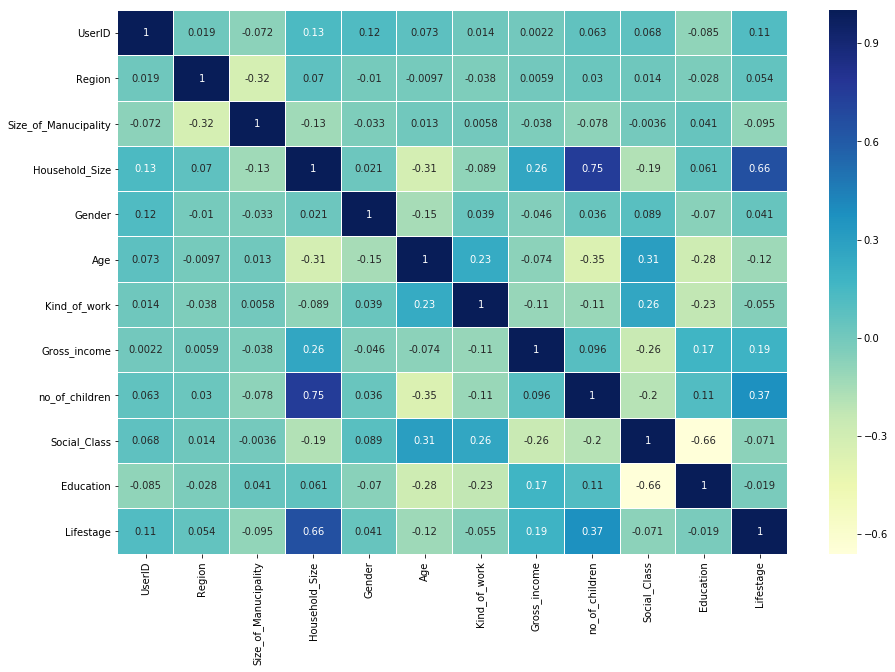

In [6]:
#Checking the relation between different features of customers.
d=demo.corr()
plt.figure(figsize=(15,10))
sns.heatmap(d,linewidth=.02,cmap="YlGnBu",annot=True)
plt.show()

## Descriptive Analysis

In [7]:
master['TIMESPSS']=pd.to_datetime(master['TIMESPSS'])
master['DayOfWeekNum'] = master['TIMESPSS'].dt.dayofweek
master['week_name'] = master['TIMESPSS'].dt.weekday_name
master['Day'] = master['TIMESPSS'].dt.day
master['Hour'] = master['TIMESPSS'].dt.hour
master['Month'] = master['TIMESPSS'].dt.month
master.head()

,UserID,Region,Size_of_Manucipality,Household_Size,Gender,Age,Kind_of_work,Gross_income,no_of_children,Social_Class,...,type_touch,purchase_own,purchase_any,MobilePanel,FixedPanel,DayOfWeekNum,week_name,Day,Hour,Month
0,9558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,0,0,0,0,5,Saturday,12,22,3
1,9558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,0,0,0,0,6,Sunday,13,5,3
2,9558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7,0,0,0,0,6,Sunday,13,12,3
3,9657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,0,0,0,5,Saturday,18,13,7
4,1,5.0,6.0,1.0,1.0,59.0,2.0,2.0,0.0,5.0,...,7,0,0,0,17,4,Friday,7,19,8


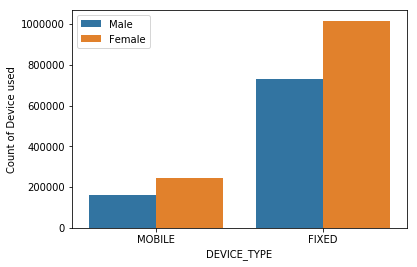

In [8]:
#Count of device used by customers with respect to gender.
mylabels=['Male','Female']
lines=sns.countplot(data=master,x='DEVICE_TYPE',hue='Gender')
plt.legend(labels=mylabels)
plt.ylabel('Count of Device used')
plt.show()

In [9]:
#Binning the touchpoints into Customer Initiated and Firm Initiated Touchpoints.
master['touch']=pd.cut(master['type_touch'],[0,16,22],right=False,labels=['CIT ','FIT'])

In [10]:
#Quering to get only the rows where purchase happened and initiated by Counsumer.
m1=master.query('purchase_any==1 or purchase_own==1 and touch=="CIT"')

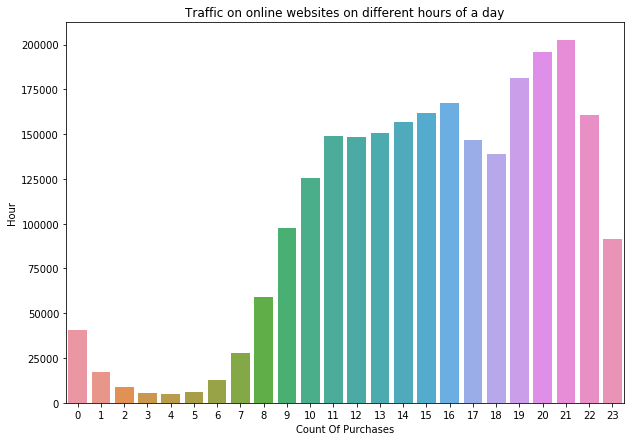

In [11]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data=master,x='Hour')
sns.set(style="darkgrid",color_codes=True)
ax.set(xlabel='Count Of Purchases', ylabel='Hour',title='Traffic on online websites on different hours of a day')
plt.show()

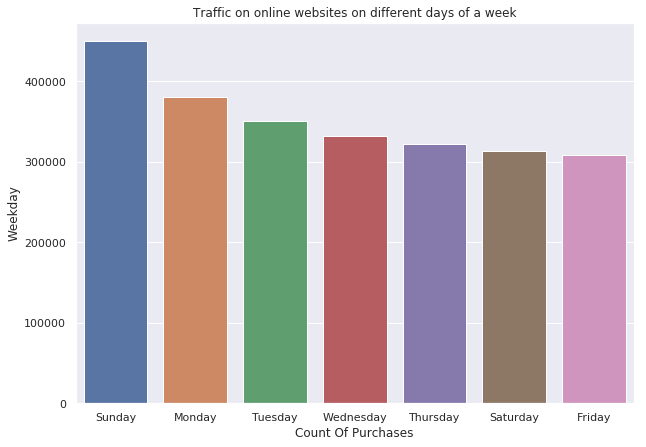

In [12]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data=master,x='week_name',order=master['week_name'].value_counts().index)
sns.set(style="darkgrid",color_codes=True)
ax.set(xlabel='Count Of Purchases', ylabel='Weekday',title='Traffic on online websites on different days of a week')
plt.show()

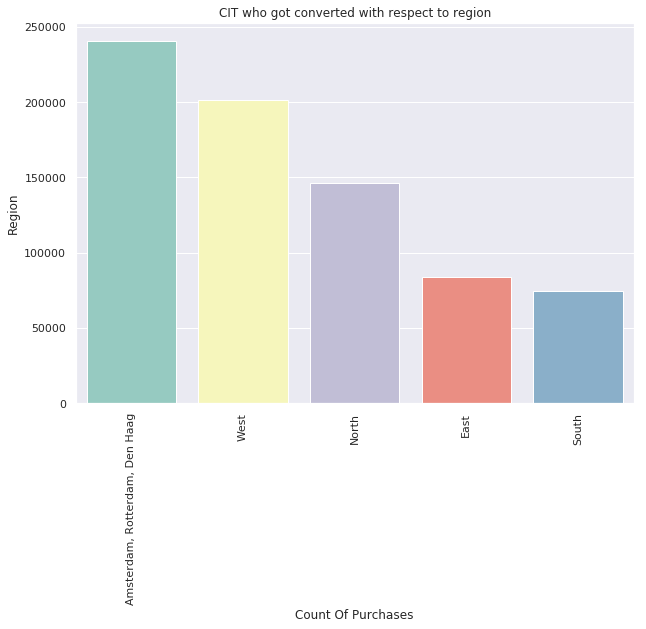

In [13]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data=m1,x='Region',palette='Set3',order=master['Region'].value_counts().index)
sns.set(style="darkgrid")
ax.set(xlabel='Count Of Purchases', ylabel='Region',title='CIT who got converted with respect to region')
plt.xticks(np.arange(5),('Amsterdam, Rotterdam, Den Haag','West','North','East','South'))
plt.xticks(rotation=90)
plt.show()

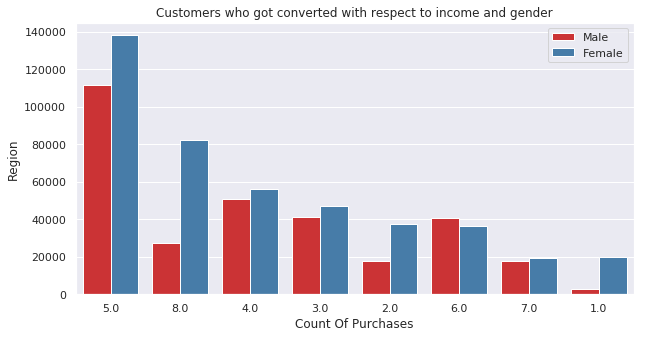

In [14]:
sns.set(style="darkgrid", palette="Set1", color_codes=True)
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Gross_income',data=m1,hue='Gender',order = master['Gross_income'].value_counts().index)
ax.set(xlabel='Count Of Purchases', ylabel='Region',title='Customers who got converted with respect to income and gender')
plt.legend(labels=mylabels)
plt.show()

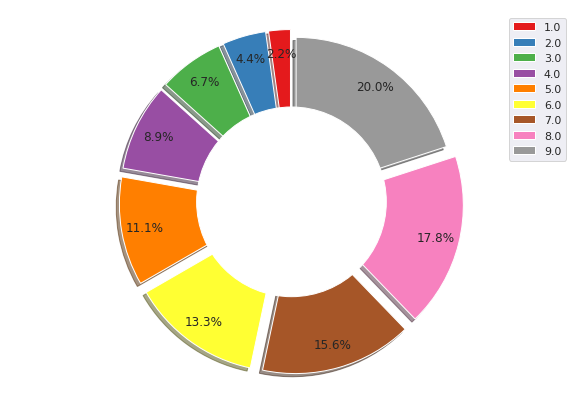

In [15]:
newfig=m1.groupby('Lifestage')[['UserID']].count().reset_index()
explode = (0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.05) 
plt.figure(figsize=(10,7))
plt.pie(newfig['Lifestage'],autopct='%1.1f%%', startangle=90, pctdistance=0.85,shadow=True,explode=explode)
plt.title='% of customers who bought the products in different Lifestages'
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(newfig['Lifestage'])
plt.axis('equal')
plt.title='% of customers who bought the products in different Lifestages'
plt.show()

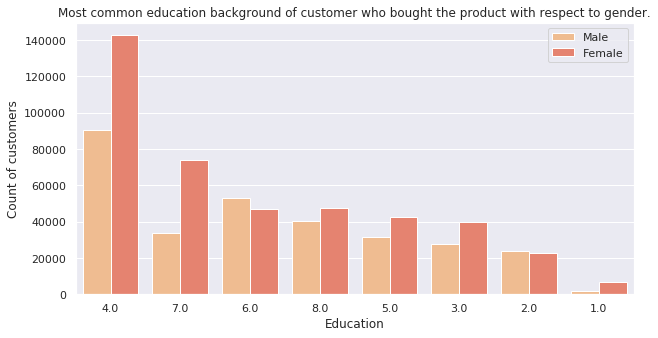

In [16]:
sns.set(style="darkgrid", palette="magma_r", color_codes=True)
plt.figure(figsize=(10,5))
b=sns.countplot(x='Education',data=m1,hue='Gender',order=m1['Education'].value_counts().index)
b.set(ylabel='Count of customers', xlabel='Education',title='Most common education background of customer who bought the product with respect to gender.')
plt.legend(labels=mylabels)
plt.show()

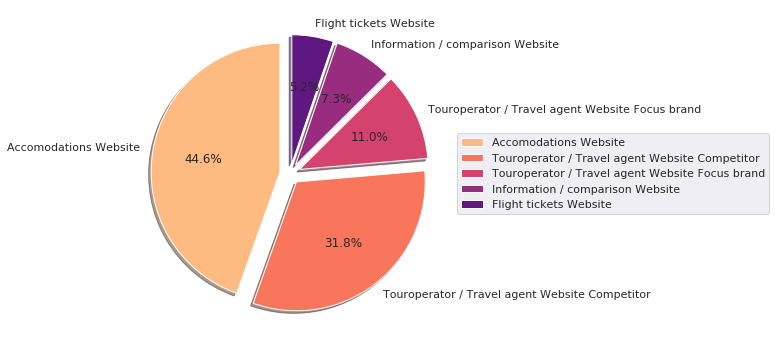

In [17]:
prange=m1.groupby('type_touch')[['UserID']].count().sort_values(by='UserID',ascending=False).head().reset_index()
explode = (0.08, 0.08, 0.08,0.08,0.08)
plt.figure(figsize=(10,5))
ax=plt.pie(prange['UserID'], explode=explode, labels=['Accomodations Website','Touroperator / Travel agent Website Competitor','Touroperator / Travel agent Website Focus brand','Information / comparison Website','Flight tickets Website'],
autopct='%1.1f%%',shadow=True, startangle=90) 
plt.title='Most sucessfull touchpoints'
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

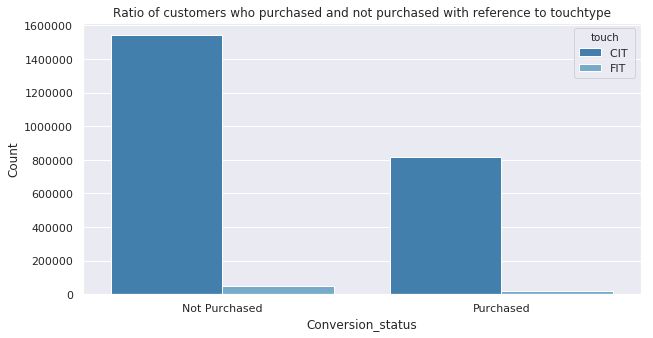

In [18]:
sns.set( palette="tab20c", color_codes=True)
plt.figure(figsize=(10,5))
a=sns.countplot(x='purchase_any',data=master,hue='touch')
a.set(xlabel='Conversion_status', ylabel='Count',title='Ratio of customers who purchased and not purchased with reference to touchtype')
plt.xticks(np.arange(2),('Not Purchased','Purchased'))
plt.show()

## Data Cleaning:

### Checking for NaN values:


In [19]:
master.isnull().sum()

UserID                  0     
Region                  304929
Size_of_Manucipality    304929
Household_Size          304929
Gender                  304929
Age                     304929
Kind_of_work            304929
Gross_income            304929
no_of_children          304929
Social_Class            304929
Education               376318
Lifestage               304929
PurchaseID              0     
TIMESPSS                0     
Duration                141065
DEVICE_TYPE             0     
type_touch              0     
purchase_own            0     
purchase_any            0     
MobilePanel             0     
FixedPanel              0     
DayOfWeekNum            0     
week_name               0     
Day                     0     
Hour                    0     
Month                   0     
touch                   34916 
dtype: int64

In [20]:
#Nan values were there in every column so dropped them.
master.dropna(inplace=True)

### Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
master['DEVICE_TYPE']=lb.fit_transform(master['DEVICE_TYPE'])

## Applying Liner Regression Model

In [22]:
X=master.drop(columns=['UserID','PurchaseID','Duration','purchase_own','purchase_any','TIMESPSS'])
Y=master['purchase_any']

### Normalizing X

In [23]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X_data=mm.fit_transform(X)
X_df=pd.DataFrame(X_data,columns=X.columns)

ValueError: could not convert string to float: 'Friday'

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
#Training and testing
x_train,x_test,y_train,y_test=train_test_split(X_df,Y,test_size=0.3,random_state=42)
print(len(x_train),len(x_test))

NameError: name 'X_df' is not defined

In [25]:
#Getting regression and prediction
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

NameError: name 'x_train' is not defined

In [26]:
#Checking RMSE and R-score.
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print('RMSE =',rmse)
print('R-squared =',r2*100,'%')

NameError: name 'y_test' is not defined